In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load dataset
file_path_= r"C:\Users\u1246538\Downloads\liss-data\Notebooks_MHI-5\merged_dataset2022.csv"
df = pd.read_csv(file_path_)  # Change to the correct dataset

# Define the target variable
target_column = 'mhi5_class_2022'  # Adjust if needed

# Define columns that may only be needed for error analysis
possible_error_analysis_columns = ['gender', 'Religion', 'Religious_Membership', 'political_interest' , 'mhi5_std_score_2022']

# Separate features and target
X = df.drop(columns=[target_column] + possible_error_analysis_columns)  # Drop target + uncertain columns
y = df[target_column]  # Target variable

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [5]:
# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_



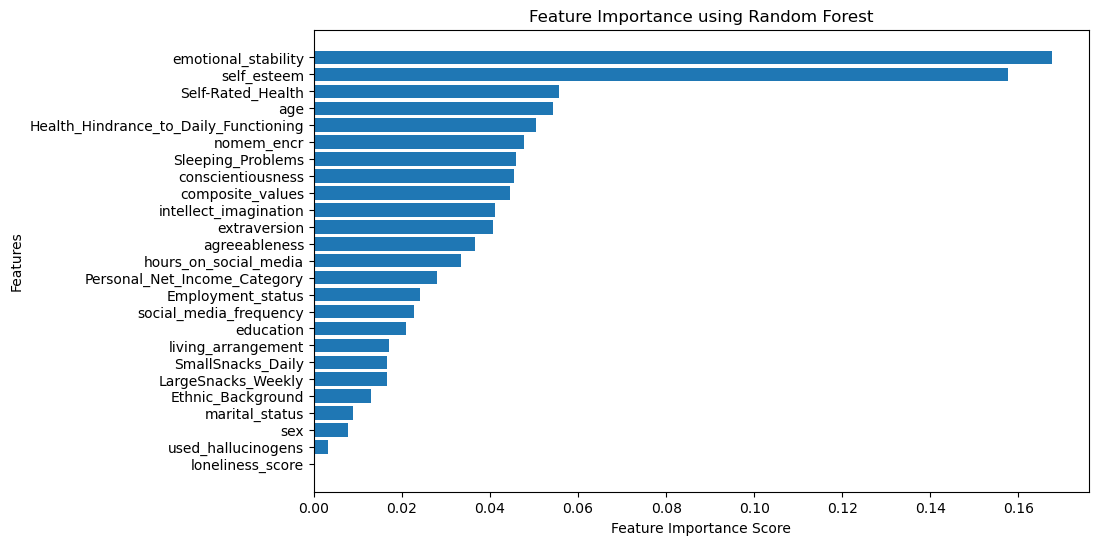

In [7]:
# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance using Random Forest")
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()



In [11]:
# Select the top N features (e.g., top 10)
top_n = 10
selected_features = importance_df['Feature'][:top_n].tolist()

# Add 'nomem_encr' to the beginning of the selected feature list
selected_features_with_id = ['nomem_encr'] + selected_features

# Create a new dataset from the full DataFrame (not just X)
rf_selected_df = df[selected_features_with_id]
rf_selected_df.info()
#save with ID column
rf_selected_df.to_csv("selected_features_rf_with_id.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   nomem_encr                             995 non-null    int64  
 1   emotional_stability                    995 non-null    float64
 2   self_esteem                            994 non-null    float64
 3   Self-Rated_Health                      995 non-null    int64  
 4   age                                    995 non-null    float64
 5   Health_Hindrance_to_Daily_Functioning  993 non-null    float64
 6   nomem_encr                             995 non-null    int64  
 7   Sleeping_Problems                      993 non-null    float64
 8   conscientiousness                      995 non-null    float64
 9   composite_values                       994 non-null    float64
 10  intellect_imagination                  995 non-null    float64
dtypes: flo